In [1]:
#importing goodies
import functools
import numpy as np
import math
import matplotlib.pyplot as plt

#trying to make it the latex font stuff
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rc('text', usetex=True)

#letting grader know what problem we're doing
print("problem 5.3")

problem 5.3


In [2]:
print("part a)")

#defining the function for the following integral
print("the function defined in this problem is f(t) = e^(-t^2)")
def f(t):
    val = np.exp(-t**2)
    return val

part a)
the function defined in this problem is f(t) = e^(-t^2)


In [3]:
print("the integral is given as the function nw_simp_int(f,a,b,N) if you wish to call it in the future")
def nw_simp_int(f,a,b,N):
    
    #definging the number of bins for future looping stuff
    h = (b-a)/N
    
    #making lists for even and odd  values
    evnval = []
    #evnval = np.array(evnval)
    oddval = []
    #oddval = np.array(oddval)
    
    
    #beginning the loop with a for - if statement
    for i in range(a+1,N):
        #setting up an if statement to get seperate odd and even summations
        if (i%2) == 0:
            evn = float(f(a+(i*h)))
            evnval.append(evn)
        else:
            odd = float(f(a+(i*h)))
            oddval.append(odd)
    
    #using lambda functions to get the summation of the even and the odd values
    sumodd = functools.reduce(lambda k,l: k+l, oddval)
    #print(sumodd)
    sumevn = functools.reduce(lambda k,l: k+l, evnval)
    #print(sumevn)
    
    #getting the final integral values
    integral = (h/3)*(f(a) + f(b) + (2*sumodd) + (4*sumevn))
    return integral

the integral is given as the function nw_simp_int(f,a,b,N) if you wish to call it in the future


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


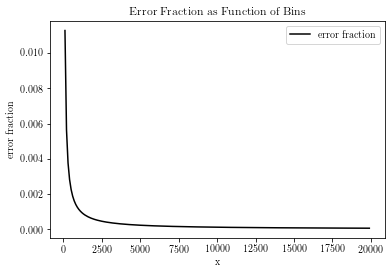

due to this graph, the optimal amount of bins seems to be ~ 10000


In [4]:
yval = []
xval = []

for i in range(100,20000,100):
    value = np.abs(((nw_simp_int(f,0,3,i)) - (math.erf(3) * (.5) * (np.pi) ** (1/2)))/(math.erf(3) * (.5) * (np.pi) ** (1/2)))
    yval.append(value)
    xval.append(i)

#show the plots and stuff
plt.plot(xval,yval, label = "error fraction", color = 'k')
plt.xlabel('x')
plt.ylabel('error fraction')
plt.title('Error Fraction as Function of Bins')
plt.legend()
plt.show()
print("due to this graph, the optimal amount of bins seems to be ~ 10000")

In [5]:
#presenting the maximum, minimum, and width of bins as arguments for the following integral
a = int(input("please provide a minimum number (a) for which to integrate from: "))
b = int(input("please provide a maximum number (b) for which to integrate from: "))
N = int(input("please provide a value for the number of bins (N) for the following integral: "))

please provide a minimum number (a) for which to integrate from: 0
please provide a maximum number (b) for which to integrate from: 3
please provide a value for the number of bins (N) for the following integral: 10000


In [6]:
#defining the number of bins for future looping stuff
h = (b-a)/N
    
#making lists for even and odd  values
evnval = []
#evnval = np.array(evnval)
oddval = []
#oddval = np.array(oddval)
    
    
#beginning the loop with a for - if statement
for i in range(a+1,N):
        
    #setting up an if statement to get seperate odd and even summations
    if (i%2) == 0:
        evn = float(f(a+(i*h)))
        evnval.append(evn)
    else:
        odd = float(f(a+(i*h)))
        oddval.append(odd)
    
#using lambda functions to get the summation of the even and the odd values
sumodd = functools.reduce(lambda k,l: k+l, oddval)
sumevn = functools.reduce(lambda k,l: k+l, evnval)
    
#getting the final integral values
integral = (h/3)*(f(a) + f(b) + (2*sumodd) + (4*sumevn))
print("the value of the integral is:",integral)

the value of the integral is: 0.8861073359074326


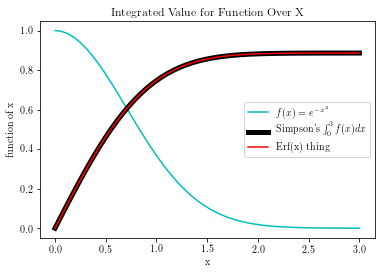

In [7]:
#initializing variable lists
Ex = []
fx = []
tx = []
x1 = []
x2 = []
x3 = []

#making lists for the function to be integrated
for x in np.linspace(a,b):
    fg = f(x)
    fx.append(fg)
    x1.append(x)

#making a list for the integrated value at that point
for i in np.linspace(a,b):
    E = nw_simp_int(f,a,i,N)
    Ex.append(E)
    x2.append(i)

#testing the erf function from math
for i in np.linspace(a,b):
    cmpr = math.erf(i) * (.5) * (np.pi)**(1/2)
    tx.append(cmpr)
    x3.append(i)
    
#show the plots and stuff
plt.plot(x1,fx, label = "$f(x) = e^{-x^{2}}$", color = 'c')
plt.plot(x2,Ex, label = "Simpson's $\int_{0}^{3}f(x)dx$", linewidth = 5, color = 'k')
plt.plot(x3,tx, label = "Erf(x) thing", color = 'r')

#Formatting, Labels, & Legends
plt.ion
plt.xlabel('x')
plt.ylabel('function of x')
plt.title('Integrated Value for Function Over X')
plt.legend()
plt.show()